# UCK 358E – Introduction to Artificial Intelligence 
## Final Exam – Part 2
## June 11, 2023




#### Name: 
#### Student Number:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

## import any library that you will use


In [3]:
# Functions for loading and plotting
def loadData():
    df = pd.read_csv("dataAll.txt", sep="\t", header=None, names=["f"+str(i) for i in range(1,66)])
    df.rename(columns = {'f65':'Class'}, inplace = True)
    return df

def split2DataSets(df_x, df_y):
    # don't change anything in this function
    strtfdSplit = StratifiedShuffleSplit(n_splits=10, test_size=0.95, random_state=32)
    kfold = strtfdSplit.split(df_x, df_y)
    dataSets = []
    for k, (train_idx, test_idx) in enumerate(kfold):
        dataSets.append({"X_train": df_x.iloc[train_idx, :], "y_train": df_y.iloc[train_idx],
                        "X_test":df_x.iloc[test_idx, :], "y_test": df_y.iloc[test_idx]})
    return dataSets

def obtainSubDataSet(dSetId):
    X_train = dataSets[dSetId]["X_train"]; y_train = dataSets[dSetId]["y_train"]
    X_test = dataSets[dSetId]["X_test"]; y_test = dataSets[dSetId]["y_test"]
    return X_train, y_train, X_test, y_test    

def plotDecisionBoundary(model, X, y):
    x_min, x_max = X[0].min() - 1, X[0].max() + 1
    y_min, y_max = X[1].min() - 1, X[1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    y_plot = model.decision_function(X_plot).reshape(xx.shape)
    
    plt.figure()
    plt.scatter(X[np.array(y == 1)][0], X[np.array(y == 1)][1], color="red")
    plt.scatter(X[np.array(y == 0)][0], X[np.array(y == 0)][1], color="blue")
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.show()

## Load and analyze whole data for feature selection

### 1) Remove at least 10 features without using class/label information (don't remove more than 20)

In [4]:
df = loadData()

In [5]:
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f56,f57,f58,f59,f60,f61,f62,f63,f64,Class
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
2,0,0,3,13,11,7,0,0,0,0,...,0,0,0,2,12,13,4,0,0,0
3,0,0,10,14,11,3,0,0,0,4,...,0,0,0,11,16,12,3,0,0,0
4,0,0,6,14,10,2,0,0,0,0,...,0,0,0,7,16,11,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,0,4,10,12,7,0,0,0,0,...,0,0,0,1,9,10,0,0,0,1
356,0,0,4,16,16,8,0,0,0,0,...,0,0,0,6,12,12,2,0,0,1
357,0,0,1,12,10,3,0,0,0,0,...,0,0,0,1,7,12,10,0,0,1
358,0,0,8,12,11,6,0,0,0,0,...,0,0,0,4,11,12,7,0,0,1


In [6]:
q=np.random.randint(0,63,10)
cols=df.columns[q]


In [7]:
df_removed = df.drop(columns=cols)

In [8]:
df_x = df_removed.loc[:, df_removed.columns != 'Class']
df_y = df_removed.loc[:, df_removed.columns == 'Class']
# You will use the new data obtained after removing several features for the rest of the study 

## Model Training

In [9]:
# Data is splitted into 10 subdatasets. "dataSets" contains these 10 different subsets
# Assume that these subsets are indepent from each other. During the training and testing, 
# only use the data that belongs to the focused subset

dataSets = split2DataSets(df_x, df_y)

In [10]:
# for example, set 2 contains it's own train and test data. 
# You can use "obtainSubDataSet" function to get train and test data for any subdataset, use its ID (between 0-9) to get data
X_train, y_train, X_test, y_test = obtainSubDataSet(2)

In [11]:
X_train

,f1,f2,f3,f4,f5,f7,f8,f9,f10,f11,...,f54,f55,f57,f58,f59,f60,f61,f62,f63,f64
52,0,0,6,15,13,0,0,0,1,15,...,16,2,0,0,4,12,14,5,0,0
245,0,0,4,16,15,0,0,0,0,8,...,4,0,0,0,3,12,14,11,0,0
18,0,0,6,15,15,0,0,0,3,16,...,16,9,0,0,5,14,15,10,1,0
29,0,0,2,12,15,1,0,0,1,14,...,8,0,0,0,2,13,14,1,0,0
273,0,0,10,9,0,0,0,0,0,8,...,16,6,0,0,7,16,16,16,16,14
307,0,0,0,14,10,0,0,0,3,14,...,0,0,0,0,0,13,13,0,0,0
359,0,0,6,12,12,0,0,0,0,11,...,8,0,0,0,2,11,10,4,0,0
41,0,0,3,12,11,0,0,0,1,14,...,16,3,0,0,1,15,14,6,0,0
74,0,0,4,12,13,0,0,0,0,14,...,12,0,0,0,4,15,14,3,0,0
206,0,0,0,4,13,0,0,0,0,0,...,9,0,0,0,0,4,14,12,0,0


### 2) Classify each subdataset independently using SVM with linear, sigmoid,  polynomial and radial basis function kernel. Give the classification accuracies on training and test sets (as a table). 

In [12]:
from sklearn import svm

In [13]:
result=pd.DataFrame(columns=["Dataset index","kernel","train_acc","test_acc"])
kernels=["linear","sigmoid","poly","rbf"]
for i in range(10):
        X_train, y_train, X_test, y_test = obtainSubDataSet(2)
        y_test=np.array(y_test).ravel()
        y_train=np.array(y_train).ravel()
        
        for j in kernels:
                model=svm.SVC(kernel=j)
                model.fit(X_train,y_train)
                y_test_pred=model.predict(X_test)
                y_train_pred=model.predict(X_train)

                train_acc=accuracy_score(y_train,y_train_pred)
                test_acc=accuracy_score(y_test,y_test_pred)
                result=result.append({
                       "Dataset index": f"Dataset_{i+1}",
                       "kernel":j,
                       "train_acc":train_acc,
                       "test_acc":test_acc
                }, ignore_index=True)


C:\Users\enes\AppData\Local\Temp\ipykernel_22436\2931903105.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({
C:\Users\enes\AppData\Local\Temp\ipykernel_22436\2931903105.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({
C:\Users\enes\AppData\Local\Temp\ipykernel_22436\2931903105.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({
C:\Users\enes\AppData\Local\Temp\ipykernel_22436\2931903105.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({
C:\Users\enes\AppData\Local\Temp\ipykernel_22436\2931903105.py:16: FutureWarning: The frame.append m

In [14]:
result

,Dataset index,kernel,train_acc,test_acc
0,Dataset_1,linear,1.0,0.956140
1,Dataset_1,sigmoid,1.0,0.979532
2,Dataset_1,poly,1.0,0.994152
3,Dataset_1,rbf,1.0,0.994152
4,Dataset_2,linear,1.0,0.956140
5,Dataset_2,sigmoid,1.0,0.979532
6,Dataset_2,poly,1.0,0.994152
7,Dataset_2,rbf,1.0,0.994152
8,Dataset_3,linear,1.0,0.956140
9,Dataset_3,sigmoid,1.0,0.979532


### 3) Use all samples in the training sets of 10 subsets to train a Neural Network (Classifier) in which there is only one hidden layer with two neurons (assume the activation function in hidden layer is linear). Reduce the dimensionality of the dataset using the outputs of hidden units (Output of the hidden units for each example will be your new feature vector for that example). Plot the reduced dataset in two dimensional spaces (Hidden1 vs Hidden2) using the test samples and illustrating the samples in different classes with different colors. 

In [43]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers,models
import keras
scaler=StandardScaler()

#encoder layers
encoder_input=layers.Input(shape=(55,))
hid=layers.Dense(2,activation='linear')(encoder_input)
encoder_output=layers.Dense(2,activation='sigmoid')(hid)

#decoder layers
decoder_input=layers.Input(shape=(2,))
hid=layers.Dense(2,activation='linear')(decoder_input)
decoder_output=layers.Dense(55,activation='linear')(hid)

#define autoencoder parts
encoder=models.Model(encoder_input,encoder_output,name='encoder')
decoder=models.Model(decoder_input,decoder_output,name='decoder')
autoencoder=models.Model(encoder_input,decoder(encoder_output),name='autoencoder')

autoencoder.compile(optimizer='adam',loss='mean_squared_error')
for i in range(10):
    X_train, y_train, X_test, y_test = obtainSubDataSet(2)
    X_train_n=scaler.fit_transform(X_train)
    
    #train
    autoencoder.fit(X_train_n,X_train_n,epochs=10,batch_size=32,validation_split=0.2)
    

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.7140 - val_loss: 0.9135
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7133 - val_loss: 0.9137
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7127 - val_loss: 0.9139
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.7121 - val_loss: 0.9141
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7115 - val_loss: 0.9143
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7110 - val_loss: 0.9145
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.7104 - val_loss: 0.9147
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7098 - val_loss: 0.9149
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.7093 - val_loss: 0.9151
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7088 - val_loss: 0.9153
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.7083 - val_loss: 0.9155
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.7078 - val_loss: 0.9157
Epoch

In [44]:
x_encoded=encoder.predict(df_x)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [45]:
def plot_clusters_2d(latent_output, true_labels, predicted, title,acc):
    plt.figure(figsize=(12, 6))

    # Plot True labels
    plt.subplot(1, 2, 1)
    plt.scatter(latent_output[:, 0], latent_output[:, 1], c=true_labels, cmap='viridis')
    plt.title(title + " True")
    plt.xlabel('Latent Feature 1')
    plt.ylabel('Latent Feature 2')
    plt.colorbar(label='True Class')

    # Plot Predicted labels
    plt.subplot(1, 2, 2)
    plt.scatter(latent_output[:, 0], latent_output[:, 1], c=predicted, cmap='viridis')
    plt.title(title + " Accuracy : {}".format(acc))
    plt.xlabel('Latent Feature 1')
    plt.ylabel('Latent Feature 2')
    plt.colorbar(label='Predicted Class')

    plt.tight_layout()
    plt.show()


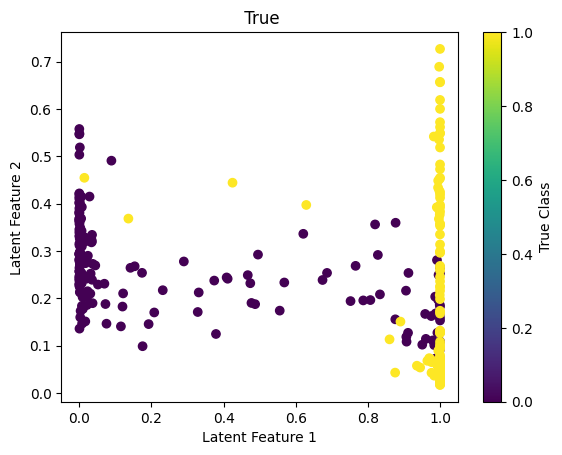

In [48]:
latent_output=x_encoded    
plt.scatter(latent_output[:, 0], latent_output[:, 1], c=df_y.values,cmap='viridis')
plt.title( " True")
plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.colorbar(label='True Class')

### 4) Use the feature transformation obtained with NN (in Q3) to train SVM classifiers. Classify each subdataset independently using SVM with linear, sigmoid,  polynomial and radial basis function kernel. Give the classification accuracies on training and test sets (as a table). This is similar to Q2, but you have two-dimensional input space (Hidden1 vs Hidden2) for SVM training now. For each case, plot also the decision boundaries using the "plotDecisionBoundary" function.   

### 5) Repeat the Q3 by training an Autoencoder instead of a Neural Network Classifier. The number of nodes in the code layer must be 2 to obtain 2 new features as in Q3. Plot the reduced dataset in two dimensional spaces (Hidden1 vs Hidden2) using the test samples and illustrating the samples in different classes with different colors. 